In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
df1=pd.read_csv('train_v9rqX0R.csv')
df2=pd.read_csv('test_AbJTz2l.csv')
df1.head()

#df2.Item_Fat_Content.value_counts()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df1.shape, df2.shape

((8523, 12), (5681, 11))

In [6]:
df1.Item_Fat_Content=df1.Item_Fat_Content.str.replace('Low Fat','LF')
df1.Item_Fat_Content=df1.Item_Fat_Content.str.replace('Regular','reg')
df1.Item_Fat_Content=df1.Item_Fat_Content.str.replace('low fat','LF')
df2.Item_Fat_Content=df2.Item_Fat_Content.str.replace('Low Fat','LF')
df2.Item_Fat_Content=df2.Item_Fat_Content.str.replace('Regular','reg')
df2.Item_Fat_Content=df2.Item_Fat_Content.str.replace('low fat','LF')
df1.Item_Fat_Content.value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
le=LabelEncoder()
df1.Item_Fat_Content=le.fit_transform(df1.Item_Fat_Content)
df2.Item_Fat_Content=le.transform(df2.Item_Fat_Content)
df1.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df1.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
df1[df1['Outlet_Size'].isna()].Outlet_Identifier.unique(), df2[df2['Outlet_Size'].isna()].Outlet_Identifier.unique()



(array(['OUT010', 'OUT045', 'OUT017'], dtype=object),
 array(['OUT017', 'OUT010', 'OUT045'], dtype=object))

In [10]:
df1out10=df1[df1.Outlet_Identifier=='OUT010'].copy()
df2out10=df2[df2.Outlet_Identifier=='OUT010'].copy()
df1rest=df1[df1.Outlet_Identifier!='OUT010'].copy()
df2rest=df2[df2.Outlet_Identifier!='OUT010'].copy()
df1out10.Outlet_Size.fillna('Small', inplace=True)
df2out10.Outlet_Size.fillna('Small', inplace=True)
df1rest.Outlet_Size.fillna('Medium', inplace=True)
df2rest.Outlet_Size.fillna('Medium', inplace=True)


In [11]:
df1=pd.concat([df1out10,df1rest], axis=0)
df2=pd.concat([df2out10,df2rest], axis=0)

In [12]:
df1['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [14]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(),inplace=True)
df2['Item_Weight'].fillna(df2['Item_Weight'].mean(),inplace=True)

In [15]:
df1[df1['Item_Weight'].isna()].Item_Type.unique()

array([], dtype=object)

In [16]:
df1.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df1.shape, df2.shape

((8523, 12), (5681, 11))

In [18]:
df1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

C:\Users\Ash_Exclusive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Location_Type'>

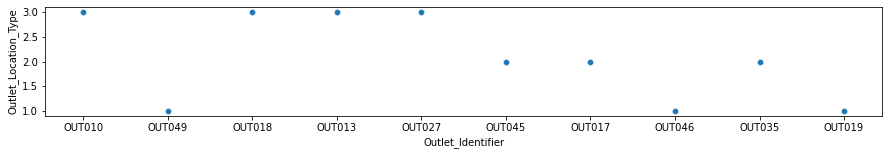

In [40]:
fig = plt.figure(figsize =(15, 2))
sns.scatterplot(df1['Outlet_Identifier'],df1['Outlet_Location_Type'])

C:\Users\Ash_Exclusive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Type'>

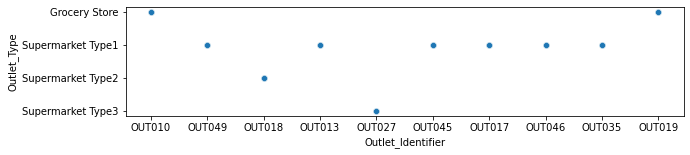

In [20]:
fig = plt.figure(figsize =(10, 2))
sns.scatterplot(df1['Outlet_Identifier'],df1['Outlet_Type'])

C:\Users\Ash_Exclusive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

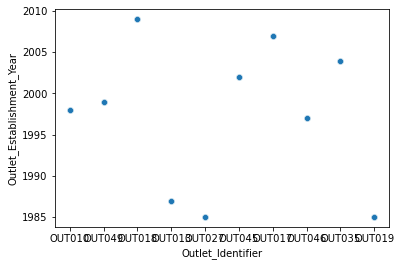

In [21]:
sns.scatterplot(df1['Outlet_Identifier'],df1['Outlet_Establishment_Year'])

In [23]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [24]:
encoded1=pd.get_dummies(df1.Outlet_Identifier)
encoded2=pd.get_dummies(df2.Outlet_Identifier)
df1=pd.concat([df1,encoded1],axis=1)
df2=pd.concat([df2,encoded2],axis=1)

In [25]:
le2=LabelEncoder()
df1.Outlet_Size=le2.fit_transform(df1.Outlet_Size)
df2.Outlet_Size=le2.transform(df2.Outlet_Size)
le3=LabelEncoder()
df1.Outlet_Establishment_Year=le3.fit_transform(df1.Outlet_Establishment_Year)
df2.Outlet_Establishment_Year=le3.transform(df2.Outlet_Establishment_Year)
le4=LabelEncoder()
df1.Outlet_Type=le4.fit_transform(df1.Outlet_Type)
df2.Outlet_Type=le4.transform(df2.Outlet_Type)
df1.Outlet_Location_Type=df1.Outlet_Location_Type.str.replace('Tier',' ')
df2.Outlet_Location_Type=df2.Outlet_Location_Type.str.replace('Tier',' ')
df1.Outlet_Location_Type=pd.to_numeric(df1.Outlet_Location_Type)
df2.Outlet_Location_Type=pd.to_numeric(df2.Outlet_Location_Type)

In [26]:
df1=df1.drop(['Item_Type','OUT049'],axis=1)
df2=df2.drop(['Item_Type','OUT049'],axis=1)

C:\Users\Ash_Exclusive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

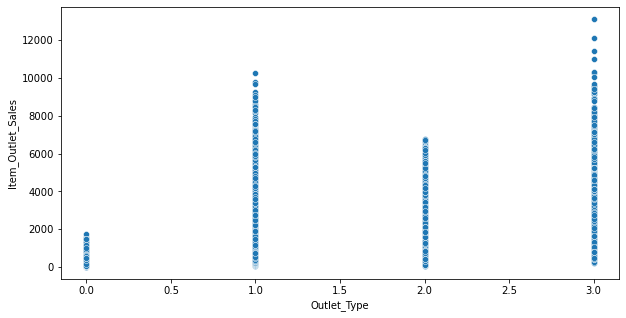

In [27]:
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(df1['Outlet_Type'],df1['Item_Outlet_Sales'])

In [28]:
df1.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,3.790684,1.235950,2.112871,1.201220,2181.288914,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117
std,4.226124,0.477836,0.051598,62.275067,2.730322,0.631686,0.812757,0.796459,1706.499616,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804
min,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,1.000000,0.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,93.826500,1.000000,1.000000,1.000000,1.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.000000,0.053931,143.012800,4.000000,1.000000,2.000000,1.000000,1794.331000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,1.000000,0.094585,185.643700,6.000000,2.000000,3.000000,1.000000,3101.296400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,1.000000,0.328391,266.888400,8.000000,2.000000,3.000000,3.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
ydf1=df1.Item_Outlet_Sales
xdf1=df1.drop('Item_Outlet_Sales', axis=1)
xdf2=df2.copy()

In [31]:
colt=['Item_Identifier','Outlet_Identifier']
xdf1=xdf1.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
later=pd.DataFrame(xdf2[colt],columns=colt)
xdf2=xdf2.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [32]:
cols=['OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046']
ss=StandardScaler()
xdf1scaled=pd.DataFrame(ss.fit_transform(xdf1),columns=xdf1.columns,index=xdf1.index)
xdf2scaled=pd.DataFrame(ss.transform(xdf2),columns=xdf2.columns,index=xdf2.index)
xdf1scaled[cols]=df1[cols]
xdf2scaled[cols]=df2[cols]

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [34]:
lr=LinearRegression()
lr.fit(xdf1scaled,ydf1)

LinearRegression()

In [35]:
model=DecisionTreeRegressor(min_samples_split=28)
model.fit(xdf1scaled,ydf1)

DecisionTreeRegressor(min_samples_split=28)

In [36]:
model=RandomForestRegressor(n_estimators=1000, min_samples_split=15, n_jobs=8)
model.fit(xdf1scaled,ydf1)

RandomForestRegressor(min_samples_split=15, n_estimators=1000, n_jobs=8)

In [37]:
model=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=8, early_stopping_rounds=7,max_depth=4)
model.fit(xdf1,ydf1)

[19:04:58] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=7,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [38]:
target=model.predict(xdf2)
res = pd.DataFrame(target)
res.columns = ["Item_Outlet_Sales"]
res=pd.concat([later,res],axis=1)
res.to_csv("prediction_results.csv", index = False)